# IE 598 Week 6 Homework

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedKFold, StratifiedShuffleSplit
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score, cross_val_predict, cross_validate
import matplotlib.pyplot as plt
from prettytable import PrettyTable
import time

In [2]:
# This is a very clean dataset, and there is no need to do more preprocessing works
ccdefault = pd.read_csv('ccdefault.csv')
# ccdefault.set_index('ID', inplace=True)
ccdefault.drop('ID', axis=1, inplace=True)
ccdefault.head()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,DEFAULT
0,20000,2,2,1,24,2,2,-1,-1,-2,...,0,0,0,0,689,0,0,0,0,1
1,120000,2,2,2,26,-1,2,0,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,90000,2,2,2,34,0,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,50000,2,2,1,37,0,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,50000,1,2,1,57,-1,0,-1,0,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


In [3]:
ccdefault.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 24 columns):
LIMIT_BAL    30000 non-null int64
SEX          30000 non-null int64
EDUCATION    30000 non-null int64
MARRIAGE     30000 non-null int64
AGE          30000 non-null int64
PAY_0        30000 non-null int64
PAY_2        30000 non-null int64
PAY_3        30000 non-null int64
PAY_4        30000 non-null int64
PAY_5        30000 non-null int64
PAY_6        30000 non-null int64
BILL_AMT1    30000 non-null int64
BILL_AMT2    30000 non-null int64
BILL_AMT3    30000 non-null int64
BILL_AMT4    30000 non-null int64
BILL_AMT5    30000 non-null int64
BILL_AMT6    30000 non-null int64
PAY_AMT1     30000 non-null int64
PAY_AMT2     30000 non-null int64
PAY_AMT3     30000 non-null int64
PAY_AMT4     30000 non-null int64
PAY_AMT5     30000 non-null int64
PAY_AMT6     30000 non-null int64
DEFAULT      30000 non-null int64
dtypes: int64(24)
memory usage: 5.5 MB


In [4]:
# Split data and label
X = ccdefault[ccdefault.columns[:-1]]
y = ccdefault['DEFAULT']
print(X.shape)
print(y.shape)

(30000, 23)
(30000,)


## Part1: Random train test split

In [5]:
# Split original data into train data and test data with stratified sampling
train_acc = []
test_acc = []
start = time.clock()
for seed in range(1, 11):
    sss = StratifiedShuffleSplit(n_splits=1, test_size=0.1, train_size=0.9, random_state=seed).split(X, y)
    for train_index, test_index in sss:
        X_train, X_test = X.values[train_index], X.values[test_index]
        y_train, y_test = y[train_index], y[test_index]
        dtree = DecisionTreeClassifier(criterion='entropy', max_depth=5, random_state=seed)
        dtree.fit(X_train, y_train)
        train_acc.append(accuracy_score(y_train, dtree.predict(X_train)))
        test_acc.append(accuracy_score(y_test, dtree.predict(X_test)))
end = time.clock()

C:\Anaconda\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: DeprecationWarning: time.clock has been deprecated in Python 3.3 and will be removed from Python 3.8: use time.perf_counter or time.process_time instead
  after removing the cwd from sys.path.
C:\Anaconda\Anaconda3\lib\site-packages\ipykernel_launcher.py:14: DeprecationWarning: time.clock has been deprecated in Python 3.3 and will be removed from Python 3.8: use time.perf_counter or time.process_time instead
  


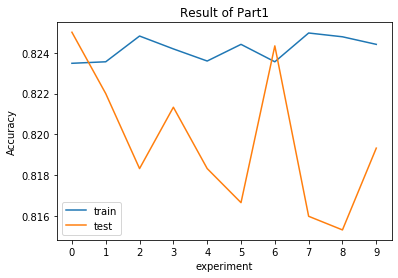

In [6]:
plt.title('Result of Part1')
plt.xticks([i for i in range(10)])
plt.plot(train_acc)
plt.plot(test_acc)
plt.legend(['train', 'test'])
plt.xlabel('experiment')
plt.ylabel('Accuracy')
plt.show()

In [7]:
table= PrettyTable(['  ','Mean of Accuracy', 'Standard Error of Accuracy'])
table.add_row(['train set', np.mean(train_acc), np.std(train_acc)])
table.add_row(['test set', np.mean(test_acc), np.std(test_acc)])
print(table)

+-----------+--------------------+----------------------------+
|           |  Mean of Accuracy  | Standard Error of Accuracy |
+-----------+--------------------+----------------------------+
| train set | 0.8241740740740742 |   0.0005558147543492025    |
|  test set | 0.8196666666666665 |   0.0032145502536643153    |
+-----------+--------------------+----------------------------+


In [8]:
print('Run time: ', end - start, 's')

Run time:  1.965780500000001 s


## Part2: Cross Validation

In [9]:
start = time.clock()
skfold = StratifiedKFold(n_splits=10, random_state=42)
dtree = DecisionTreeClassifier(criterion='entropy', max_depth=5, random_state=42)
# val_scores = cross_val_score(dtree, X_train_val, y_train_val, cv=skfold)
results = cross_validate(dtree, X, y, cv=skfold, return_train_score=True)
end = time.clock()
results.keys()

C:\Anaconda\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: time.clock has been deprecated in Python 3.3 and will be removed from Python 3.8: use time.perf_counter or time.process_time instead
  """Entry point for launching an IPython kernel.
C:\Anaconda\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: DeprecationWarning: time.clock has been deprecated in Python 3.3 and will be removed from Python 3.8: use time.perf_counter or time.process_time instead
  


dict_keys(['fit_time', 'score_time', 'test_score', 'train_score'])

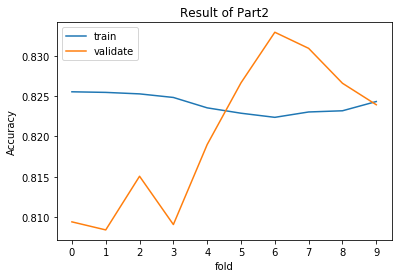

In [10]:
plt.title('Result of Part2')
plt.xticks([i for i in range(10)])
plt.plot(results['train_score'])
plt.plot(results['test_score'])
plt.legend(['train', 'validate'])
plt.xlabel('fold')
plt.ylabel('Accuracy')
plt.show()

In [11]:
table= PrettyTable(['  ','Mean of Accuracy', 'Standard Error of Accuracy'])
table.add_row(['train set', np.mean(results['train_score']), np.std(results['train_score'])])
table.add_row(['validate set', np.mean(results['test_score']), np.std(results['test_score'])])
print(table)

+--------------+--------------------+----------------------------+
|              |  Mean of Accuracy  | Standard Error of Accuracy |
+--------------+--------------------+----------------------------+
|  train set   | 0.824055585952553  |    0.001125729119316715    |
| validate set | 0.8202024172928611 |    0.008846508311594335    |
+--------------+--------------------+----------------------------+


In [12]:
print('Run time: ', end - start, 's')

Run time:  1.8304253999999993 s


In [13]:
print("My name is Zizheng Zhang")
print("My NetID is: zizheng2")
print("I hereby certify that I have read the University policy on Academic Integrity and that I am not in violation.")

My name is Zizheng Zhang
My NetID is: zizheng2
I hereby certify that I have read the University policy on Academic Integrity and that I am not in violation.
